In [7]:
import numpy as np
from methods import *
def Animate(*args, hs=None, labels=None, title="", xlim=[-20, 20], ylim=[-25, 25], zlim=[0, 50]):
    
    if hs is not None:
        mults = np.max(hs) / np.array(hs)
    else:
        mults = (1,) * len(args)
    
    fig = plt.figure(figsize=(12.8, 7.2), tight_layout=True)
    ax = fig.gca(projection="3d")

    ax.w_xaxis.pane.set_color("w")
    ax.w_yaxis.pane.set_color("w")
    ax.w_zaxis.pane.set_color("w")
    ax.set_xlabel("x Axis")
    ax.set_ylabel("y Axis")
    ax.set_zlabel("z Axis")
    ax.set_xlim3d(xlim)
    ax.set_ylim3d(ylim)
    ax.set_zlim3d(zlim)
    ax.set_title(f"{title}", pad=16)

    lines = ()
    points = ()
    for i, states in enumerate(args):
        lines += ax.plot(states[0:1, 0], states[0:1, 1], states[0:1, 2], color=f"C{i}", linewidth=0.5, alpha=0.95)[0],
        points += ax.plot(states[0:1, 0], states[0:1, 1], states[0:1, 2], ".", color=f"C{i}")[0],
    plt.close()

    def init():
        for _, line, point in zip(args, lines, points):
            line.set_data([], [])
            line.set_3d_properties([])
            point.set_data([], [])
            point.set_3d_properties([])
        return (*lines, *points)

    def update(i):
        for states, line, point, mult in zip(args, lines, points, mults):
            line.set_data(states.T[:2, :int(mult * i)])
            line.set_3d_properties(states.T[2, :int(mult * i)])
            point.set_data(states[int(mult * i), :2])
            point.set_3d_properties(states[int(mult * i), 2])
        return (*lines, *points)

    if labels is not None:
        ax.legend(lines, labels)

    FuncAnimation(fig, update, frames=len(args[0]), init_func=init, interval=4, blit=True).save("anim.mp4", bitrate=5000)

### Schrittweitensensitivität

In [2]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

state0 = (1, 1, 1)

t1 = np.arange(0, 20, 1/100)
t2 = np.arange(0, 20, 1/200)
t3 = np.arange(0, 20, 1/1000)

states1 = ABM(f, state0, t1)
states2 = ABM(f, state0, t2)
states3 = ABM(f, state0, t3)

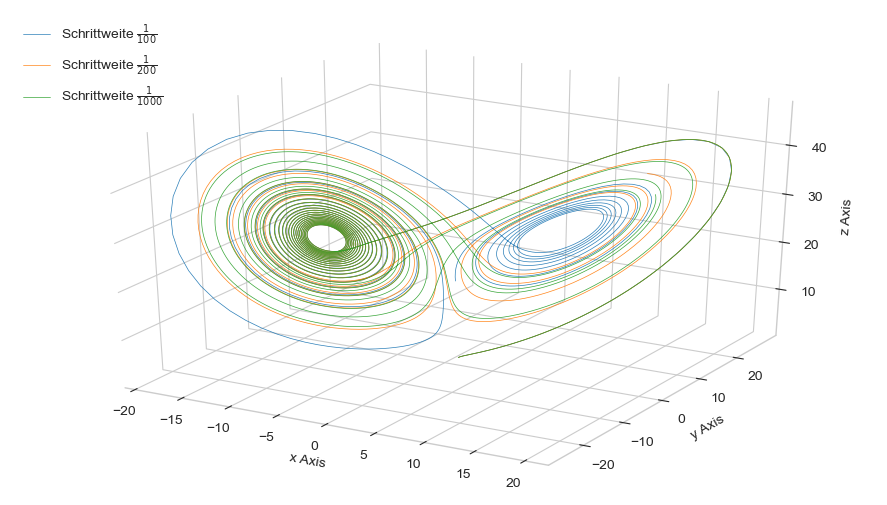

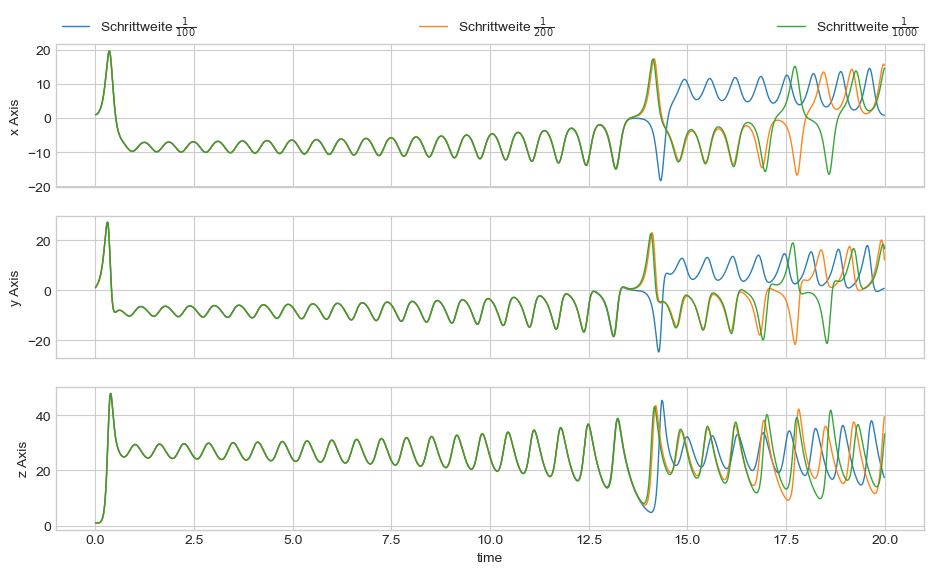

In [3]:
labels = (r"Schrittweite $\frac{1}{100}$", r"Schrittweite $\frac{1}{200}$", r"Schrittweite $\frac{1}{1000}$")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_stepsize_paramplot.png")
Plot((t1, t2, t3), states1, states2, states3, labels=labels, sameAxis=False, fname="PC_stepsize_compplot.png")

In [4]:
Animate(states1, states2, states3, hs=(1/100, 1/200, 1/1000))

### Chaos

In [8]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/1000

state1 = (1, 1, 1)
state2 = (1+h, 1+h, 1+h)
state3 = (1-h, 1-h, 1-h)

t = np.arange(0, 20, h)

states1 = ABM(f, state1, t)
states2 = ABM(f, state2, t)
states3 = ABM(f, state3, t)

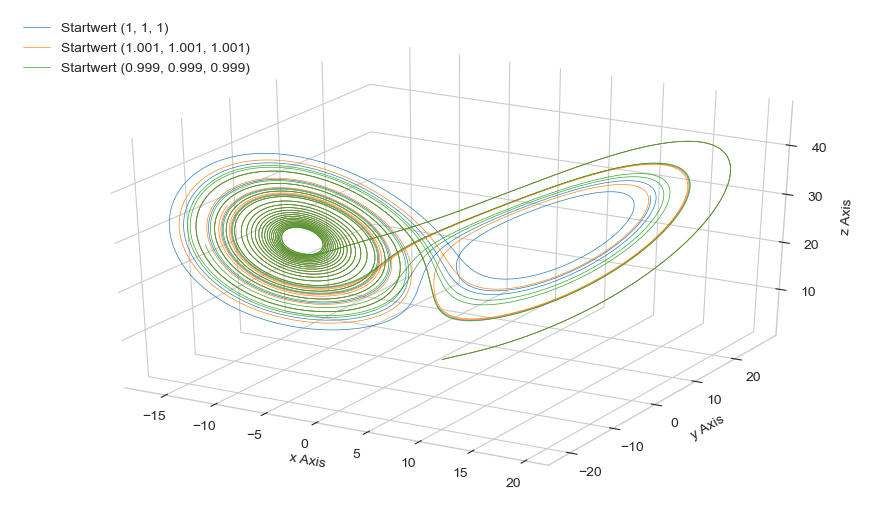

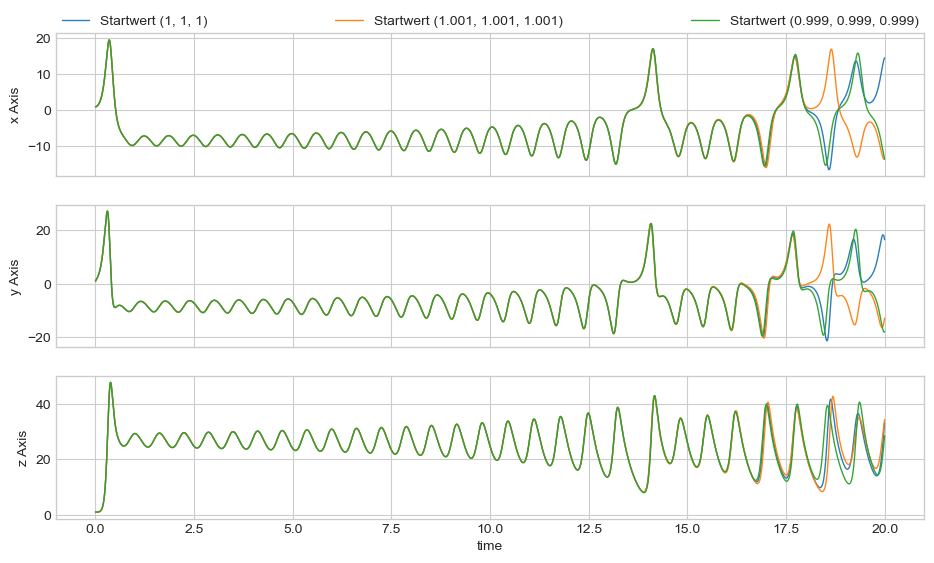

In [9]:
labels = (f"Startwert {state1}", f"Startwert {state2}", f"Startwert {state3}")

ParametricPlot(states1, states2, states3, labels=labels)
Plot(t, states1, states2, states3, labels=labels)

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")

sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/1000

state1 = (1, 1, 1)
state2 = (1+h, 1+h, 1+h)
state3 = (1-h, 1-h, 1-h)

t = np.arange(0, 20, h)

states1 = ABM(f, state1, t)
states2 = ABM(f, state2, t)
states3 = ABM(f, state3, t)

labels = (f"Startwert {state1}", f"Startwert {state2}", f"Startwert {state3}")

1
2


KeyboardInterrupt: 

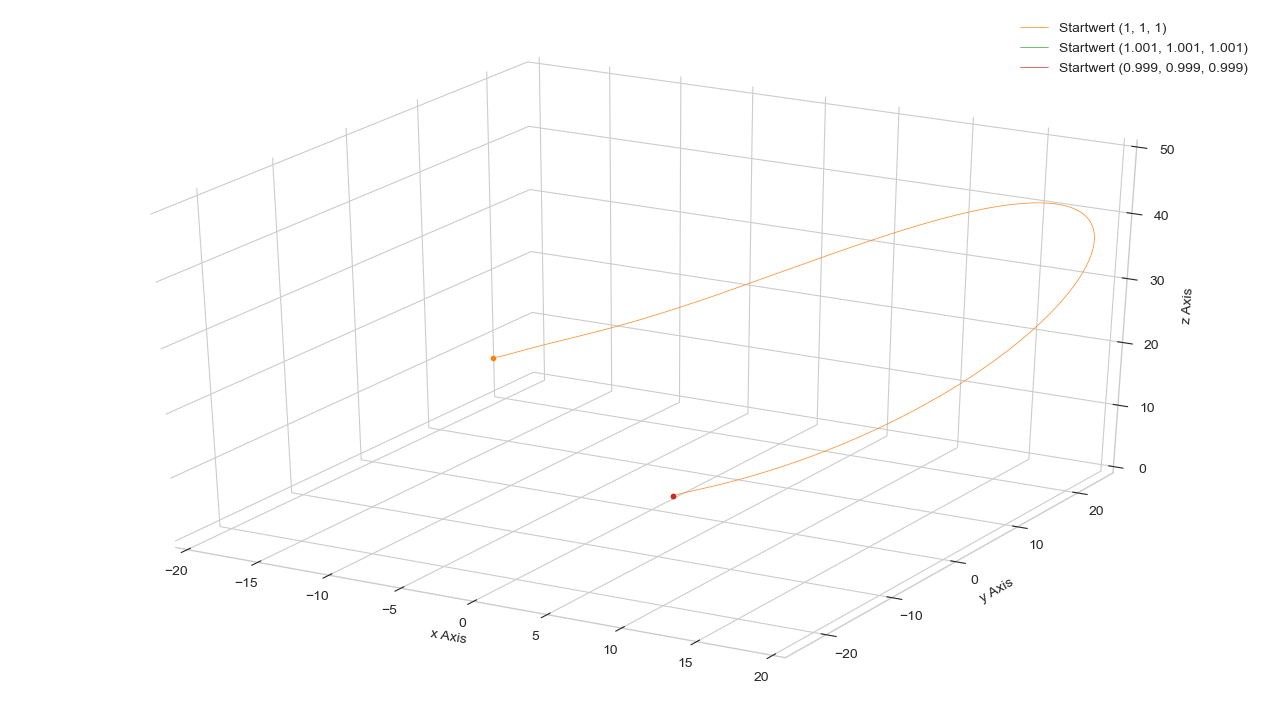

In [13]:
fig = plt.figure(figsize=(12.8, 7.2), tight_layout=True)
ax = fig.gca(projection="3d")

ax.w_xaxis.pane.set_color("w")
ax.w_yaxis.pane.set_color("w")
ax.w_zaxis.pane.set_color("w")
ax.set_xlabel("x Axis")
ax.set_ylabel("y Axis")
ax.set_zlabel("z Axis")
ax.set_xlim3d([-20, 20])
ax.set_ylim3d([-25, 25])
ax.set_zlim3d([0, 50])

lines = (
    ax.plot(states1[0:1, 0], states1[0:1, 1], states1[0:1, 2], color=f"C1", linewidth=0.5, alpha=0.95)[0],
    ax.plot(states2[0:1, 0], states2[0:1, 1], states2[0:1, 2], color=f"C2", linewidth=0.5, alpha=0.95)[0],
    ax.plot(states3[0:1, 0], states3[0:1, 1], states3[0:1, 2], color=f"C3", linewidth=0.5, alpha=0.95)[0]
)
points = (
    ax.plot(states1[0:1, 0], states1[0:1, 1], states1[0:1, 2], ".", color=f"C1")[0],
    ax.plot(states2[0:1, 0], states2[0:1, 1], states2[0:1, 2], ".", color=f"C2")[0],
    ax.plot(states3[0:1, 0], states3[0:1, 1], states3[0:1, 2], ".", color=f"C3")[0]
)

def update(i):
    lines[0].set_data(states1.T[:2, :i])
    lines[0].set_3d_properties(states1.T[2, :i])
    points[0].set_data(states1[i, :2])
    points[0].set_3d_properties(states1[i, 2])

    lines[0].set_data(states2.T[:2, :i])
    lines[0].set_3d_properties(states2.T[2, :i])
    points[0].set_data(states2[i, :2])
    points[0].set_3d_properties(states2[i, 2])

    lines[0].set_data(states3.T[:2, :i])
    lines[0].set_3d_properties(states3.T[2, :i])
    points[0].set_data(states3[i, :2])
    points[0].set_3d_properties(states3[i, 2])

    return (*lines, *points)

ax.legend(lines, labels)
print("1")
anim = FuncAnimation(fig, update, frames=len(states1), interval=4, blit=True)
print("2")
anim.save("anim.mp4", bitrate=5000)

### Datenexport

In [18]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/100
t = np.arange(0, 50, h)
state1 = (1, 1, 1)

data = ABM(f, state1, t)

#np.savetxt("PC_data.txt", data, fmt="%.16f", delimiter=",", newline="),\n(")

### $\rho$

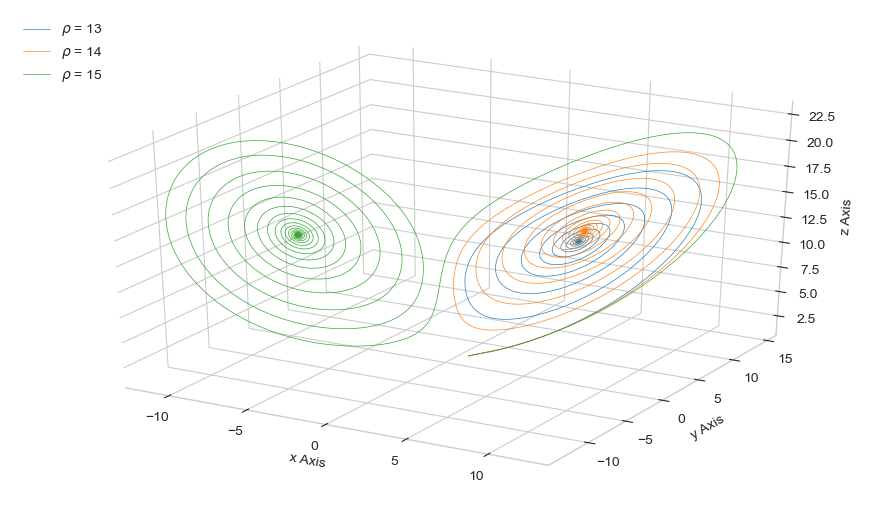

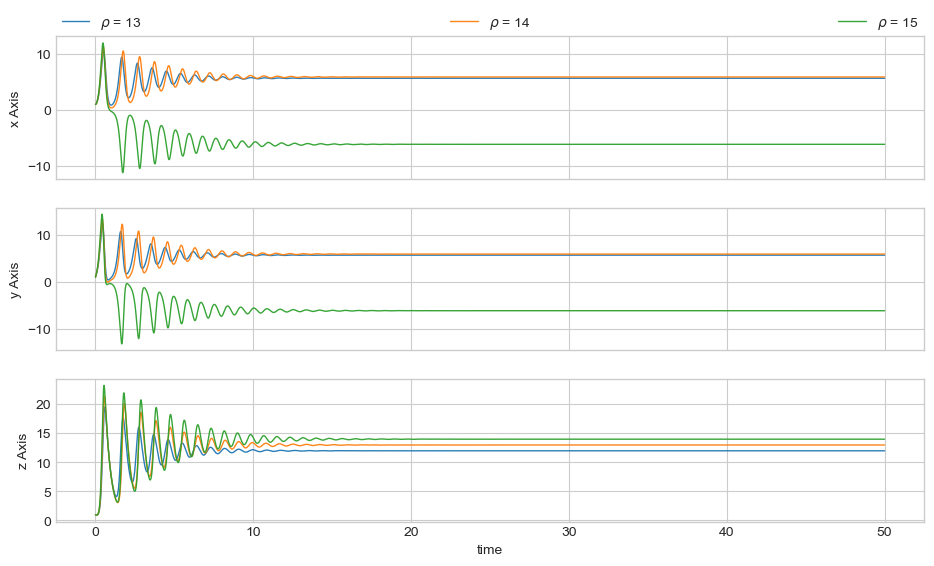

In [47]:
sigma = 10
beta = 8/3

rho1 = 13
rho2 = 14
rho3 = 15

f1 = LorenzSystem(sigma, rho1, beta)
f2 = LorenzSystem(sigma, rho2, beta)
f3 = LorenzSystem(sigma, rho3, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 50, 1/1000)

states1 = ABM(f1, state0, t)
states2 = ABM(f2, state0, t)
states3 = ABM(f3, state0, t)

labels = (fr"$\rho$ = {rho1}", fr"$\rho$ = {rho2}", fr"$\rho$ = {rho3}")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_stablerho_param.png")
Plot(t, states1, states2, states3, labels=labels, fname="PC_stablerho_comp.png")

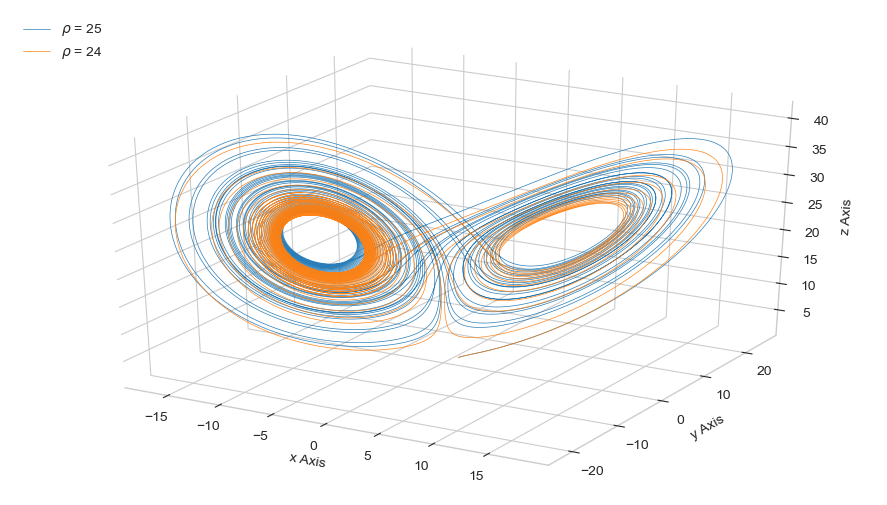

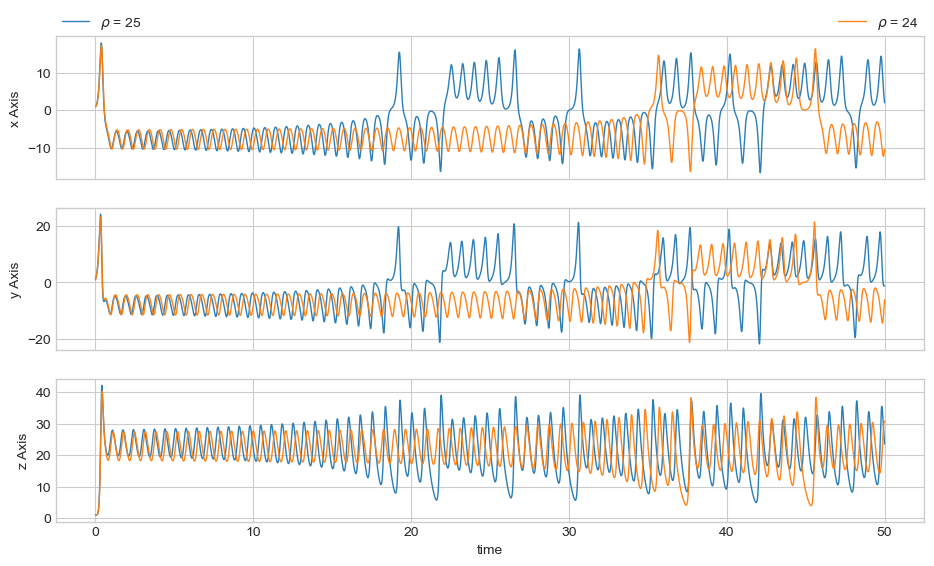

In [28]:
sigma = 10
beta = 8/3

rho1 = 25
rho2 = 24

f1 = LorenzSystem(sigma, rho1, beta)
f2 = LorenzSystem(sigma, rho2, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 50, 1/1000)

states1 = ABM(f1, state0, t)
states2 = ABM(f2, state0, t)

labels = (fr"$\rho$ = {rho1}", fr"$\rho$ = {rho2}")

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

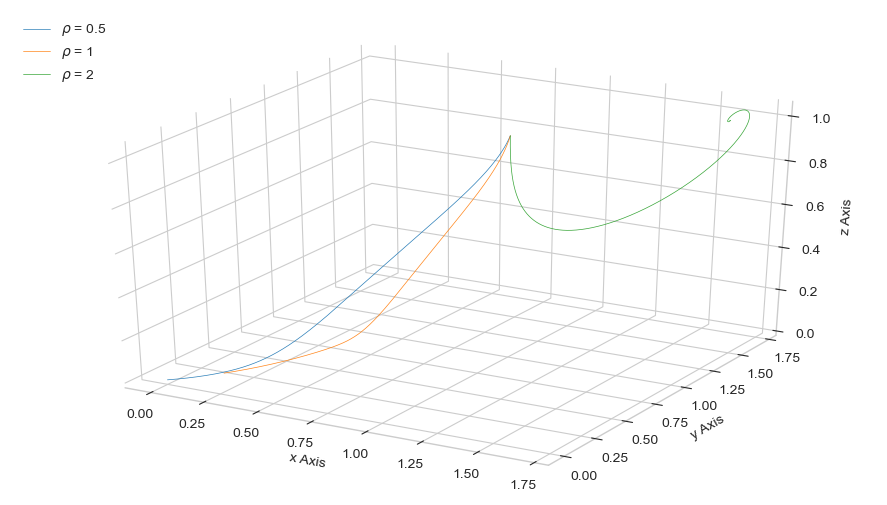

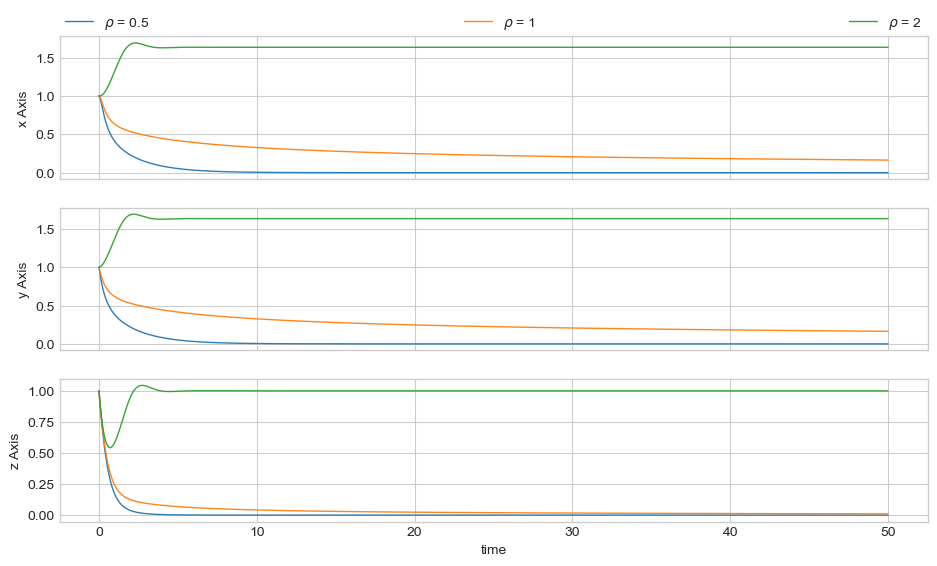

In [45]:
sigma = 10
beta = 8/3

rho1 = 0.5
rho2 = 1
rho3 = 2

f1 = LorenzSystem(sigma, rho1, beta)
f2 = LorenzSystem(sigma, rho2, beta)
f3 = LorenzSystem(sigma, rho3, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 50, 1/1000)

states1 = ABM(f1, state0, t)
states2 = ABM(f2, state0, t)
states3 = ABM(f3, state0, t)

labels = (fr"$\rho$ = {rho1}", fr"$\rho$ = {rho2}", fr"$\rho$ = {rho3}")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_smallrho_param.png")
Plot(t, states1, states2, states3, labels=labels)

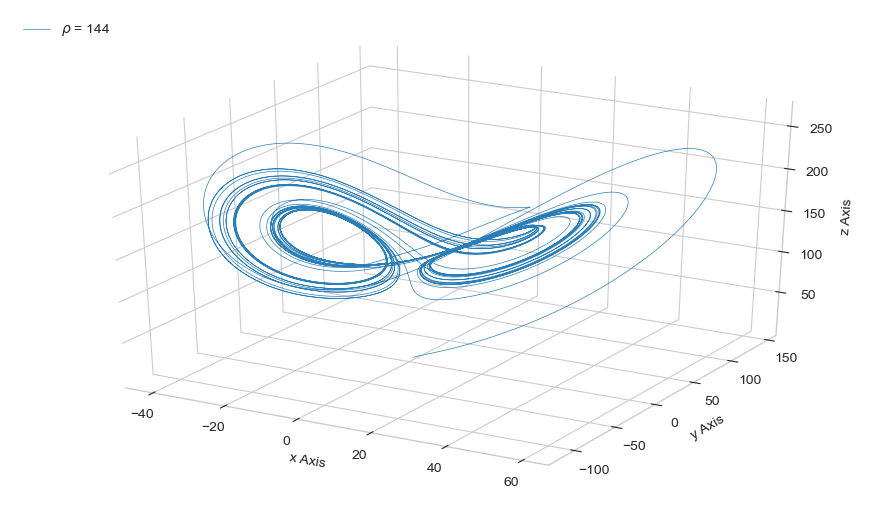

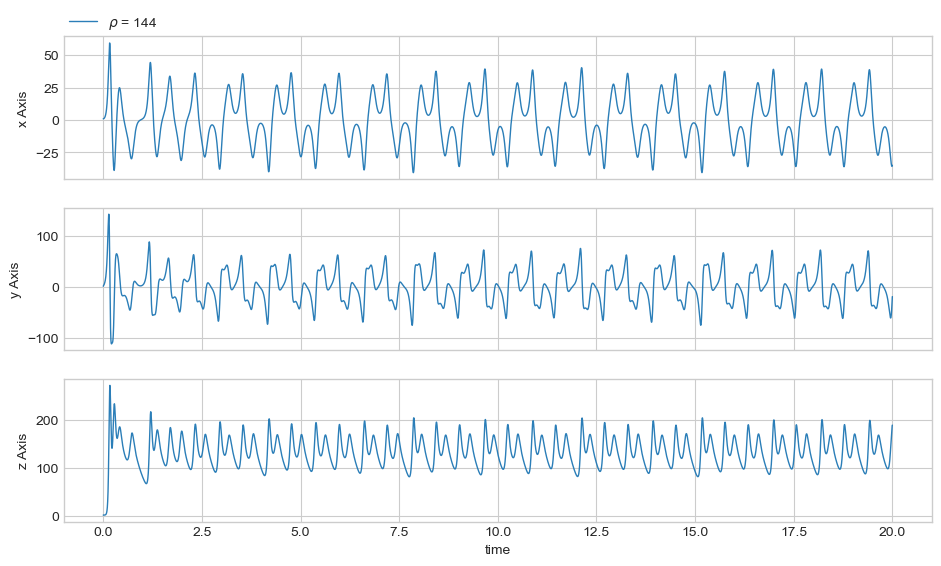

In [46]:
sigma = 10
rho = 144
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 20, 1/1000)

states = ABM(f, state0, t)

labels = (fr"$\rho$ = {rho}",)

ParametricPlot(states, labels=labels, fname="PC_doublerho_param.png")
Plot(t, states, labels=labels, fname="PC_doublerho_comp.png")

In [10]:
with open("1d100.txt", "r") as file:
    states100 = np.array(eval(file.read()))

In [11]:
with open("1d200.txt", "r") as file:
    states200 = np.array(eval(file.read()))

In [12]:
with open("1d1000.txt", "r") as file:
    states1000 = np.array(eval(file.read()))

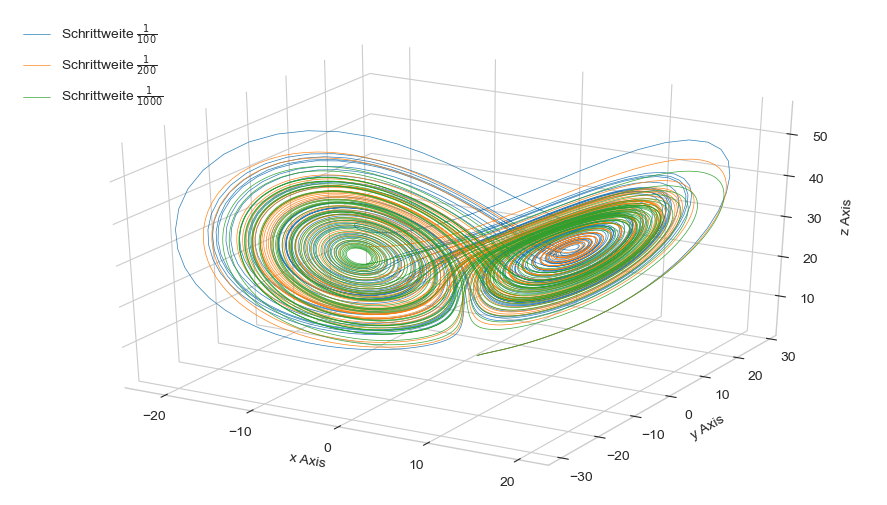

In [21]:
labels = (r"Schrittweite $\frac{1}{100}$", r"Schrittweite $\frac{1}{200}$", r"Schrittweite $\frac{1}{1000}$")
ParametricPlot(states100, states200, states1000, labels=labels, fname="RK_stepsize_param.png")